# 0.) Import and Clean data

In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from sklearn.decomposition import PCA

In [4]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [5]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/Week9/Country-data.csv", sep = ",")

In [6]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [8]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)

In [9]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Run a PCA Algorithm to get 2 Principle Components for the 9 X features

In [10]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

In [11]:
X_pca.shape

(167, 2)

# 2.) Plot a Scatter plot of the PCs on the axis

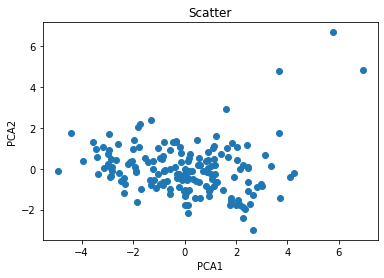

In [12]:
plt.scatter(x=X_pca[:,0],y=X_pca[:,1])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Scatter')
plt.show()

# 3.) Rank the features in order of importance according to PCA

In [13]:
loadings = pca.components_

In [14]:
loadings

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ]])

In [15]:
feature_importance = pd.DataFrame(np.sum(loadings**2,axis=0),columns=['importance'])

In [16]:
feature_importance['country'] = df.columns[1:]

In [17]:
feature_importance.sort_values(by = ['importance'], ascending = False)

,importance,country
3,0.477420,imports
1,0.456567,exports
6,0.230937,life_expec
0,0.213201,child_mort
7,0.187094,total_fer
4,0.159263,income
8,0.156288,gdpp
2,0.081843,health
5,0.037386,inflation


# 4.) Plot a heatmap of the feature importance (Fill in all parameters)

In [18]:
feature_names = df.columns[1:]

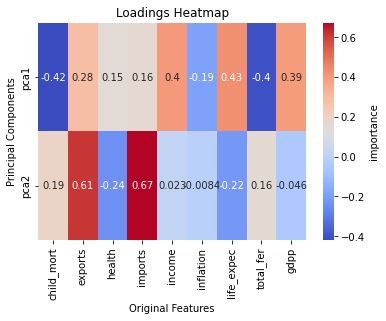

In [19]:

#sns.heatmap(, annot=, cmap='coolwarm', xticklabels, yticklabels=[, ], cbar_kws={'label':''})
sns.heatmap(loadings, annot = True, cmap='coolwarm', xticklabels=feature_names, yticklabels=['pca1','pca2'], cbar_kws={'label':'importance'})

plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.title('Loadings Heatmap')
plt.show()

# 5.) Plot a correlation plot of the original features. What do you notice between the graphs of 4 & 5?

<Axes: >

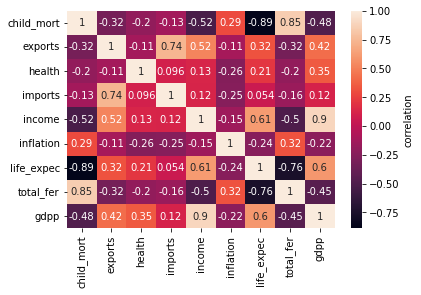

In [28]:
sns.heatmap(X.corr(), annot = True, cbar_kws={'label':'correlation'})

###From pca1 we can see, child_mort is highly negative related to life_expec and highly positive related to total_fer, and thus their coefficient in pca1 is large negative and large positive. From pca2 we can also see exports and imports are highly positive correlated, and so their coefficient in pca2 are large positive. As a result we can say: PCs will give large and similar coefficient to features in order to increase uncorrelation between PCs.

# 6.) Run a PCA with 9 PCs. Plot a Cumulative Explained Variance Plot. How many PCs should we use if we want to retain 95% of the variance?

In [21]:
pca = PCA(n_components = 9)
X_pca = pca.fit_transform(X_scaled)

In [22]:
np.cumsum(pca.explained_variance_ratio_)

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
       0.97015232, 0.98275663, 0.99256944, 1.        ])

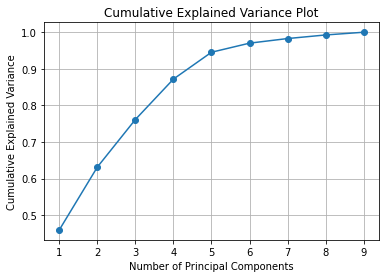

In [24]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()

In [25]:
cumulative_explained_variance[4]

0.9453099756439513

In [26]:
cumulative_explained_variance[5]

0.9701523224082288

###From the plot, it seems that 5 PCs are enough, but after testing, we need at least 6 PCs to retain 95% of the variance.